C:\Users\Armin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


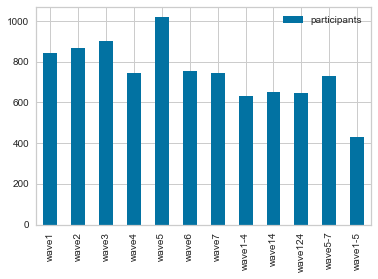

In [1]:
#Steps 1-3

import numpy as np
import pandas as pd
import datetime
import pandas_profiling as pp
from IPython.display import display, HTML
import pymannkendall as mk
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from itertools import combinations
import itertools


%matplotlib inline
pd.options.display.max_columns = None

pd.options.display.max_rows = 10
pd.options.display.width = 200
np.set_printoptions(precision = 4, suppress = True) 

legit_classes1 = [67,71,72,74,77,78,79,81,83,86,100,101,103,121,122,125,126,127,129,130,131,133,135,138]
legit_classes2 = [73,74,78,81,82,86,100,103,124,125,131,133,135,141,250,251,256,258,259,261,262,263,272,273,277,279,290,291,292,296,297,298,299,300,301,302,303,304,305,306,307,308,310]
participants = pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/8. Metadata/Participant_Info.csv", sep= ';')

par_w1 = participants["W1"] == 1
par_w2 = participants["W2"] == 1
par_w3 = participants["W3"] == 1
par_w4 = participants["W4"] == 1
par_w5 = participants["W5"] == 1
par_w6 = participants["W6"] == 1
par_w7 = participants["W7"] == 1

total1 = len(participants[par_w1])
total2 = len(participants[par_w3])
total3 = len(participants[par_w2])
total4 = len(participants[par_w4])
total5 = len(participants[par_w5])
total6 = len(participants[par_w6])
total7 = len(participants[par_w7])
total1_4 = len(participants[par_w1 & par_w2 & par_w3 & par_w4])
total14 = len(participants[par_w1 & par_w4])
total124 = len(participants[par_w1 & par_w2 & par_w4])
total5_7 = len(participants[par_w5 & par_w6 & par_w7])
total1_5 = len(participants[par_w1 & par_w2 & par_w3 & par_w4 & par_w5])

par_per_wave = pd.DataFrame({
    'participants': [total1, total2, total3, total4, total5, total6, total7, total1_4, total14, total124, total5_7, total1_5]}, index=['wave1', 'wave2', 'wave3', 'wave4', 'wave5', 'wave6', 'wave7', 'wave1-4', 'wave14','wave124', 'wave5-7', 'wave1-5'])

par_per_wave.plot.bar()


#display(participants[par_w1 & par_w2 & par_w3 & par_w4 & par_w5 & par_w6 & par_w7])
#print(participants[par_w1 & par_w2 & par_w3 & par_w4].count)


In [2]:
#getting participants from 1 to 3
participants1_3 = participants[['Child','Class_Y1']][par_w1 & par_w2 & par_w3]
participants1_3 = participants1_3[participants1_3["Class_Y1"].isin(legit_classes1)]
par_13 = participants1_3
participants1_3 = participants1_3["Child"].tolist()
schools = participants['School'][participants['Child'].isin(participants1_3)].unique().tolist()
display(schools)

[25, 26, 27, 29, 28, 30, 32, 33, 34, 37, 39, 42, 40]

In [3]:
#fit
#compare waves with eachother as percentage for example
fit_clean = pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/5. Fitbit data/Fitbit_W17_cleaned_imputation.csv", sep= ';')
fit_clean1_3 = fit_clean[fit_clean["Child"].isin(participants1_3)]

fit_clean1_3 = fit_clean1_3[fit_clean1_3["Wave"] <= 3]

fit_clean1_3['Date'] = pd.to_datetime(fit_clean1_3['Date'])

fit_clean1_3['Weekend'] = fit_clean1_3['Date'].dt.day_name()
fit_clean1_3['Weekend'].loc[(fit_clean1_3['Weekend'].isin(['Saturday', 'Sunday']))] = 0
fit_clean1_3['Weekend'].loc[(fit_clean1_3['Weekend'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']))] = 1

fit_clean1_3 = fit_clean1_3.drop(columns = ['Day', 'Imputed','Participated', 'Date'])
display(fit_clean1_3[fit_clean1_3['Child'] == 1222])

C:\Users\Armin\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,School,Class,Child,Sex,Age,Wave,Steps,Minutes_MVPA,Weekend
1726,25,67,1222,1,11.0,1,12620.0,0.0,1
1727,25,67,1222,1,11.0,1,4601.0,0.0,1
1728,25,67,1222,1,11.0,1,3498.0,0.0,0
1729,25,67,1222,1,12.0,2,7554.0,17.0,1
1730,25,67,1222,1,12.0,2,6924.0,13.0,1
1731,25,67,1222,1,12.0,2,3665.0,0.0,1
1732,25,67,1222,1,12.0,3,2845.0,0.0,0
1733,25,67,1222,1,12.0,3,1702.0,0.0,0
1734,25,67,1222,1,12.0,3,8011.0,10.0,1


,Child,Wave,School,Class,Steps,Sex,Age,Weekend_steps,Week_steps,MVPA,Weekend_MVPA,Week_MVPA
0,1222,1,25,67,6906.333333,1,11.0,3498.0,8610.500000,0.000000,0.000000,0.000000
1,1222,2,25,67,6047.666667,1,12.0,NaN,6047.666667,10.000000,NaN,10.000000
2,1222,3,25,67,4186.000000,1,12.0,2273.5,8011.000000,3.333333,0.000000,10.000000
3,1224,1,25,67,6971.000000,1,12.0,7248.0,6555.500000,22.000000,24.333333,18.500000
4,1224,2,25,67,9913.600000,1,12.0,NaN,9913.600000,20.000000,NaN,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1075,3191,2,40,135,10548.250000,1,9.0,10799.0,10297.500000,44.250000,40.000000,48.500000
1076,3191,3,40,135,8701.000000,1,10.0,12417.0,6843.000000,54.666667,111.000000,26.500000
1077,3192,1,40,135,10895.750000,0,10.0,10097.0,11162.000000,50.500000,31.000000,57.000000
1078,3192,2,40,135,10053.250000,0,10.0,5043.0,11723.333333,43.250000,0.000000,57.666667


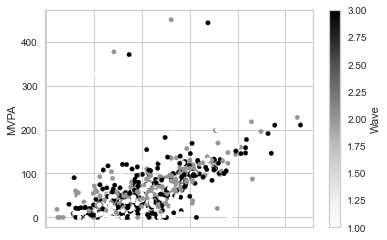

In [4]:
# getting fitbit data and splitting it in weekdays and weekend days for wave 1-3
avg_steps_13 = fit_clean1_3[['School', 'Class', 'Child', 'Wave', 'Weekend','Steps', 'Sex', 'Age']].copy()
avg_mvpa_13 = fit_clean1_3[['School', 'Class', 'Child', 'Wave', 'Weekend', 'Minutes_MVPA', 'Sex', 'Age']].copy()

temp = avg_steps_13.groupby(['Child','Wave', 'Weekend']).mean()
temp = temp.reset_index()
weekend_days = temp[['Child', 'Wave','Steps']][temp['Weekend'] == 0]
week_days = temp[['Child', 'Wave','Steps']][temp['Weekend'] == 1]
weekend_days.columns = ['Child', 'Wave', 'Weekend_steps']
week_days.columns = ['Child', 'Wave', 'Week_steps']

avg_steps_13 = avg_steps_13.groupby(['Child', 'Wave']).mean()
avg_steps_13.columns = ['School', 'Class', 'Steps', 'Sex', 'Age']
avg_steps_13 = avg_steps_13.reset_index()
avg_steps_13 = avg_steps_13.merge(weekend_days, how = 'left')
avg_steps_13 = avg_steps_13.merge(week_days, how = 'left')

temp = avg_mvpa_13.groupby(['Child','Wave', 'Weekend']).mean()
temp = temp.reset_index()
weekend_mvpa = temp[['Child', 'Wave','Minutes_MVPA']][temp['Weekend'] == 0]
week_mvpa = temp[['Child', 'Wave','Minutes_MVPA']][temp['Weekend'] == 1]
weekend_mvpa.columns = ['Child', 'Wave', 'Weekend_MVPA']
week_mvpa.columns = ['Child', 'Wave', 'Week_MVPA']

avg_mvpa_13 = avg_mvpa_13.groupby(['Child', 'Wave']).mean()
avg_mvpa_13.columns = ['School', 'Class', 'MVPA', 'Sex', 'Age']
avg_mvpa_13 = avg_mvpa_13.reset_index()
avg_mvpa_13 = avg_mvpa_13.merge(weekend_mvpa, how = 'left')
avg_mvpa_13 = avg_mvpa_13.merge(week_mvpa, how = 'left')

full_table_13 = avg_steps_13.merge(avg_mvpa_13)

display(full_table_13)
full_table_13.plot.scatter(x = 'Steps', y = 'MVPA', c = 'Wave')

In [5]:
#getting the overall trend (so postive, no trend or negative) and getting the trend line (slope) 
new_table = fit_clean1_3
new_table = new_table.drop(['Wave', 'Minutes_MVPA', 'Weekend'], axis = 1)
new_table["Trend"] = np.nan

In [6]:
for index, row in new_table.iterrows():
    temp = mk.original_test(new_table[new_table['Child'] == row['Child']]['Steps'], alpha=0.05).slope
    overall = mk.original_test(new_table[new_table['Child'] == row['Child']]['Steps'], alpha=0.05).trend
    new_table.loc[new_table['Child'] == row['Child'], 'Trend'] = temp
    new_table.loc[new_table['Child'] == row['Child'], 'Overall_Trend'] = overall    

In [7]:
temp = new_table[['Child', 'Trend','Overall_Trend']].drop_duplicates()
full_table_13 = full_table_13.merge(temp)
full_table_13

,Child,Wave,School,Class,Steps,Sex,Age,Weekend_steps,Week_steps,MVPA,Weekend_MVPA,Week_MVPA,Trend,Overall_Trend
0,1222,1,25,67,6906.333333,1,11.0,3498.0,8610.500000,0.000000,0.000000,0.000000,-603.062500,no trend
1,1222,2,25,67,6047.666667,1,12.0,NaN,6047.666667,10.000000,NaN,10.000000,-603.062500,no trend
2,1222,3,25,67,4186.000000,1,12.0,2273.5,8011.000000,3.333333,0.000000,10.000000,-603.062500,no trend
3,1224,1,25,67,6971.000000,1,12.0,7248.0,6555.500000,22.000000,24.333333,18.500000,276.125000,increasing
4,1224,2,25,67,9913.600000,1,12.0,NaN,9913.600000,20.000000,NaN,20.000000,276.125000,increasing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,3191,2,40,135,10548.250000,1,9.0,10799.0,10297.500000,44.250000,40.000000,48.500000,280.500000,no trend
1076,3191,3,40,135,8701.000000,1,10.0,12417.0,6843.000000,54.666667,111.000000,26.500000,280.500000,no trend
1077,3192,1,40,135,10895.750000,0,10.0,10097.0,11162.000000,50.500000,31.000000,57.000000,-116.857143,no trend
1078,3192,2,40,135,10053.250000,0,10.0,5043.0,11723.333333,43.250000,0.000000,57.666667,-116.857143,no trend


In [8]:
# getting the class trend (mean of class)
temp = full_table_13[['Child', 'Class', 'Trend']].drop_duplicates()
temp = temp[['Class', 'Trend']]
temp = temp.groupby('Class').mean()
temp.columns = ['Class_Trend']
temp = temp.reset_index()
full_table_13 = full_table_13.merge(temp)

Mann_Kendall_Test(trend='increasing', h=True, p=0.016393316888809073, z=2.400039184633096, Tau=0.5454545454545454, s=36.0, var_s=212.66666666666666, slope=620.0416666666667, intercept=7582.270833333333)

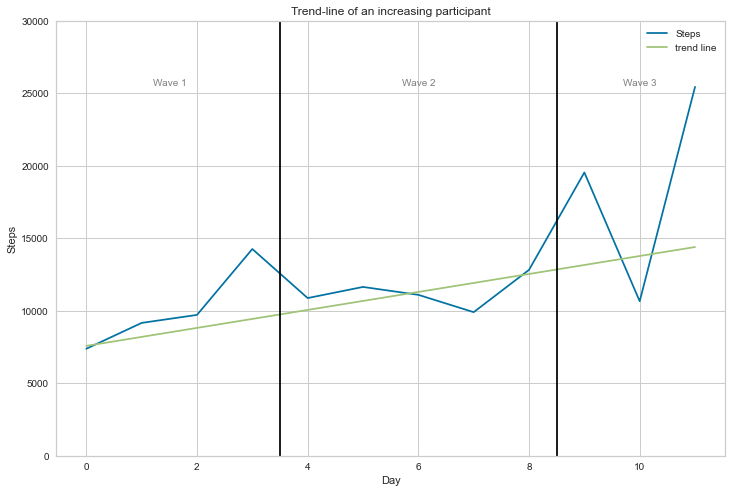

In [9]:
# plot of this participant including all labels etc
iets = fit_clean1_3[fit_clean1_3['Child'] == 3190]['Steps'].reset_index()
iets = iets['Steps']

fig, ax = plt.subplots(figsize=(12, 8))
res = mk.hamed_rao_modification_test(iets)
trend_line = np.arange(len(iets)) * res.slope + res.intercept

ax.plot(iets)
ax.set_ylim([0,30000])
ax.plot(iets.index, trend_line)
ax.legend(['Steps', 'trend line'])
plt.title('Trend-line of an increasing participant')
plt.xlabel('Day')
plt.ylabel('Steps')
plt.axvline(x = 3.5, color='black')
plt.axvline(x = 8.5, color='black')
style = dict(size=10, color='gray')
ax.text(1.5, 25500, "Wave 1", ha='center',**style)
ax.text(6, 25500, "Wave 2", ha='center',**style)
ax.text(10, 25500, "Wave 3", ha='center',**style)

temp = mk.original_test(iets, alpha=0.05)
temp

Mann_Kendall_Test(trend='increasing', h=True, p=0.0487449207397066, z=1.9708160452248922, Tau=0.4065934065934066, s=37.0, var_s=333.6666666666667, slope=276.125, intercept=7573.1875)

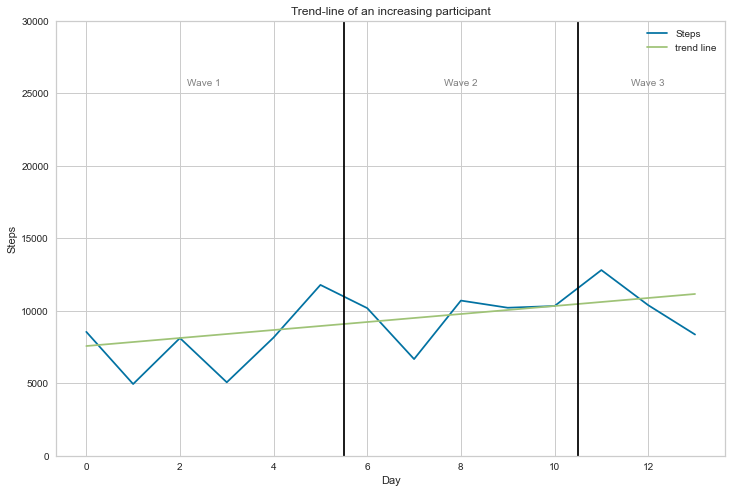

In [10]:
iets = fit_clean1_3[fit_clean1_3['Child'] == 1224]['Steps'].reset_index()
iets = iets['Steps']

fig, ax = plt.subplots(figsize=(12, 8))
res = mk.hamed_rao_modification_test(iets)
trend_line = np.arange(len(iets)) * res.slope + res.intercept

ax.plot(iets)
ax.set_ylim([0,30000])
ax.plot(iets.index, trend_line)
ax.legend(['Steps', 'trend line'])
plt.title('Trend-line of an increasing participant')
plt.xlabel('Day')
plt.ylabel('Steps')
plt.axvline(x = 5.5, color='black')
plt.axvline(x = 10.5, color='black')
style = dict(size=10, color='gray')
ax.text(2.5, 25500, "Wave 1", ha='center',**style)
ax.text(8, 25500, "Wave 2", ha='center',**style)
ax.text(12, 25500, "Wave 3", ha='center',**style)

temp = mk.original_test(iets, alpha=0.05)
temp

Mann_Kendall_Test(trend='decreasing', h=True, p=0.01648865672767008, z=-2.39791576165636, Tau=-0.6666666666666666, s=-24.0, var_s=92.0, slope=-703.0, intercept=7289.0)

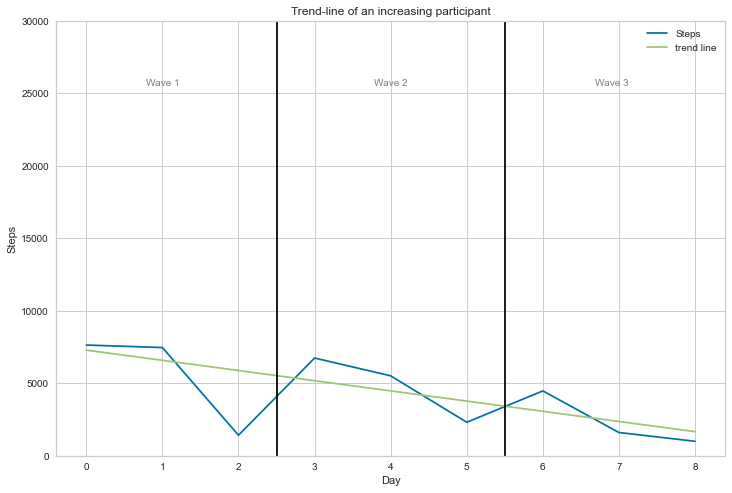

In [11]:
iets = fit_clean1_3[fit_clean1_3['Child'] == 1232]['Steps'].reset_index()
iets = iets['Steps']

fig, ax = plt.subplots(figsize=(12, 8))
res = mk.hamed_rao_modification_test(iets)
trend_line = np.arange(len(iets)) * res.slope + res.intercept

ax.plot(iets)
ax.set_ylim([0,30000])
ax.plot(iets.index, trend_line)
ax.legend(['Steps', 'trend line'])
plt.title('Trend-line of an increasing participant')
plt.xlabel('Day')
plt.ylabel('Steps')
plt.axvline(x = 2.5, color='black')
plt.axvline(x = 5.5, color='black')
style = dict(size=10, color='gray')
ax.text(1, 25500, "Wave 1", ha='center',**style)
ax.text(4, 25500, "Wave 2", ha='center',**style)
ax.text(6.9, 25500, "Wave 3", ha='center',**style)

temp = mk.original_test(iets, alpha=0.05)
temp

Mann_Kendall_Test(trend='no trend', h=False, p=0.640428787412791, z=-0.46709936649691375, Tau=-0.12727272727272726, s=-7.0, var_s=165.0, slope=-116.85714285714286, intercept=11146.285714285714)

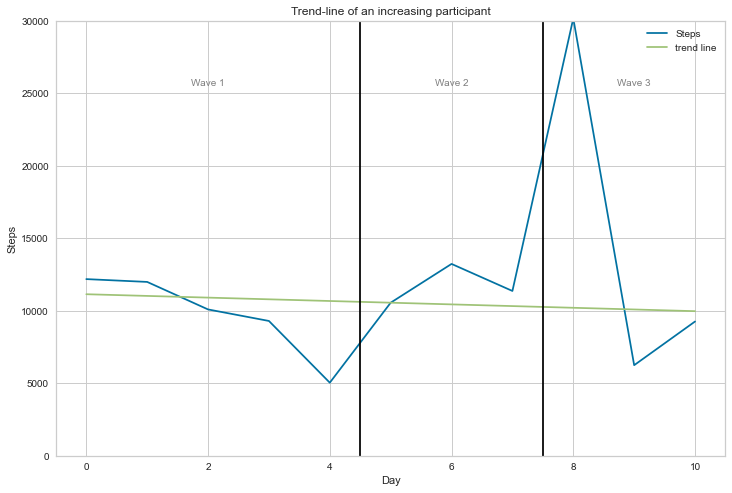

In [12]:
iets = fit_clean1_3[fit_clean1_3['Child'] == 3192]['Steps'].reset_index()
iets = iets['Steps']

fig, ax = plt.subplots(figsize=(12, 8))
res = mk.hamed_rao_modification_test(iets)
trend_line = np.arange(len(iets)) * res.slope + res.intercept

ax.plot(iets)
ax.set_ylim([0,30000])
ax.plot(iets.index, trend_line)
ax.legend(['Steps', 'trend line'])
plt.title('Trend-line of an increasing participant')
plt.xlabel('Day')
plt.ylabel('Steps')
plt.axvline(x = 4.5, color='black')
plt.axvline(x = 7.5, color='black')
style = dict(size=10, color='gray')
ax.text(2, 25500, "Wave 1", ha='center',**style)
ax.text(6, 25500, "Wave 2", ha='center',**style)
ax.text(9, 25500, "Wave 3", ha='center',**style)

temp = mk.original_test(iets, alpha=0.05)
temp

In [13]:
#socio
socio_gbl_123 = pd.read_excel("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/1. Social network data/social_networks_global_waves123.xlsx", sep= ';')
socio_gbl_567 = pd.read_excel("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/1. Social network data/social_networks_global_waves567.xlsx", sep= ';')
socio_lcl_123 = pd.read_excel("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/1. Social network data/social_networks_local_waves123.xlsx", sep= ';')
socio_lcl_567 = pd.read_excel("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/1. Social network data/social_networks_local_waves567.xlsx", sep= ';')

socio_lcl_123 = socio_lcl_123.rename(columns={"Node": "Child"})
socio_lcl_123 = socio_lcl_123.drop(['Unnamed: 0', 'ClusteringC'], axis = 1)
socio_gbl_123 = socio_gbl_123.drop(['Unnamed: 0'], axis = 1)

#Add socio data to the full table of week 5-7
full_table_13 = full_table_13.merge(socio_gbl_123)
full_table_13 = full_table_13.merge(socio_lcl_123)
display(full_table_13)

,Child,Wave,School,Class,Steps,Sex,Age,Weekend_steps,Week_steps,MVPA,Weekend_MVPA,Week_MVPA,Trend,Overall_Trend,Class_Trend,Avg_Short_Path,Density,Edges,Nodes,Betweeness,Closeness,Degree,Eigenvector
0,1222,1,25,67,6906.333333,1,11.0,3498.0,8610.500000,0.000000,0.000000,0.000000,-603.062500,no trend,182.252684,1.330065,0.669935,205,18,0.024125,0.772727,1.470588,0.238135
1,1222,2,25,67,6047.666667,1,12.0,NaN,6047.666667,10.000000,NaN,10.000000,-603.062500,no trend,182.252684,1.330065,0.669935,205,18,0.024125,0.772727,1.470588,0.238135
2,1222,3,25,67,4186.000000,1,12.0,2273.5,8011.000000,3.333333,0.000000,10.000000,-603.062500,no trend,182.252684,1.330065,0.669935,205,18,0.024125,0.772727,1.470588,0.238135
3,1224,1,25,67,6971.000000,1,12.0,7248.0,6555.500000,22.000000,24.333333,18.500000,276.125000,increasing,182.252684,1.330065,0.669935,205,18,0.017039,0.772727,1.294118,0.240811
4,1224,2,25,67,9913.600000,1,12.0,NaN,9913.600000,20.000000,NaN,20.000000,276.125000,increasing,182.252684,1.330065,0.669935,205,18,0.017039,0.772727,1.294118,0.240811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,3191,2,40,135,10548.250000,1,9.0,10799.0,10297.500000,44.250000,40.000000,48.500000,280.500000,no trend,309.834625,1.111111,0.888889,272,18,0.016198,1.000000,2.000000,0.262937
1076,3191,3,40,135,8701.000000,1,10.0,12417.0,6843.000000,54.666667,111.000000,26.500000,280.500000,no trend,309.834625,1.111111,0.888889,272,18,0.016198,1.000000,2.000000,0.262937
1077,3192,1,40,135,10895.750000,0,10.0,10097.0,11162.000000,50.500000,31.000000,57.000000,-116.857143,no trend,309.834625,1.111111,0.888889,272,18,0.000000,0.739130,1.588235,0.167689
1078,3192,2,40,135,10053.250000,0,10.0,5043.0,11723.333333,43.250000,0.000000,57.666667,-116.857143,no trend,309.834625,1.111111,0.888889,272,18,0.000000,0.739130,1.588235,0.167689


In [14]:
#questionnaire 
questionnaire_1 = pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/4. Questionnaire data/W1_Main_questions.csv", sep= ';')
questionnaire_2 = pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/4. Questionnaire data/W2_Main_questions.csv", sep= ';')
questionnaire_3 = pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/4. Questionnaire data/W3_Main_questions.csv", sep= ';')
questionnaire_123 = questionnaire_1.merge(questionnaire_2, on = 'Child')
questionnaire_123 = questionnaire_123.merge(questionnaire_3, on = 'Child')
questionnaire_123 = questionnaire_123[['PA_Barriers_Resource_place_1','Child']]

temp = questionnaire_2.loc[:, questionnaire_2.columns.str.contains('facili')]
temp['Child'] = ""
temp = questionnaire_2[temp.columns]
temp = temp.set_index('Child')

# Give a 0 or 1 value for each facility wether it is or is not in the enviroment of the child
for index, row in temp.iterrows():
    temp.loc[index,'Bos'] = row.str.contains('Bos').any()
    temp.loc[index,'Park'] = row.str.contains('Park').any()
    temp.loc[index,'Speelplein'] = row.str.contains('Speelplein').any()
    temp.loc[index,'Speeltuin'] = row.str.contains('Speeltuin').any()
    temp.loc[index,'Sportschool'] = row.str.contains('Sportschool').any()
    temp.loc[index,'Sportclub'] = row.str.contains('Sportclub').any()
    temp.loc[index,'Zwembad'] = row.str.contains('Zwembad').any()
    temp.loc[index,'Meer_zee'] = row.str.contains('Meer_zee').any()
    temp.loc[index,'Dansschool'] = row.str.contains('Dansschool').any()
    temp.loc[index,'Sporthal'] = row.str.contains('Sporthal').any()
    temp.loc[index,'Grasveld'] = row.str.contains('Grasveld').any()
    
temp.drop(temp.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]],axis=1,inplace=True)
temp = temp.astype(int)

C:\Users\Armin\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [15]:
temp = temp.reset_index()
full_table_13 = full_table_13.drop(columns=['Steps', 'Weekend_steps','MVPA','Weekend_MVPA','Week_steps','Week_MVPA','Wave'])
full_table_13 = full_table_13[full_table_13.index % 3 == 0]
full_table_13 = full_table_13.merge(temp)

# merge with the barrier question
temp = questionnaire_123
full_table_13 = full_table_13.merge(temp)
full_table_13['PA_Barriers_Resource_place_1'] = full_table_13['PA_Barriers_Resource_place_1'].fillna(method = 'ffill')

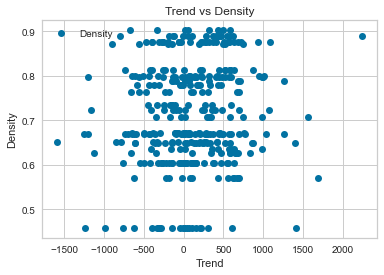

[-182.9209]
[[402.1753]]


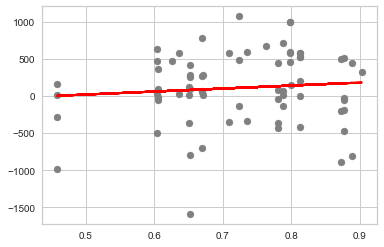

,Actual,Predicted
0,58.500000,86.510255
1,673.000000,124.194772
2,987.166667,137.760971
3,517.125000,143.846518
4,508.500000,169.780440
...,...,...
67,1070.875000,108.177401
68,284.283333,86.959883
69,267.833333,86.510255
70,420.500000,79.316201


In [16]:
# do linear regression on trend by using density as variable
temp = full_table_13
temp[['Trend','Density']]
temp.plot(x='Trend', y='Density', style='o')  
plt.title('Trend vs Density')  
plt.xlabel('Trend')  
plt.ylabel('Density')  
plt.show()

X = temp['Density'].values.reshape(-1,1)
y = temp['Trend'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
df

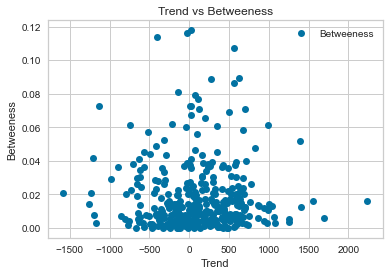

[106.818]
[[-221.7369]]


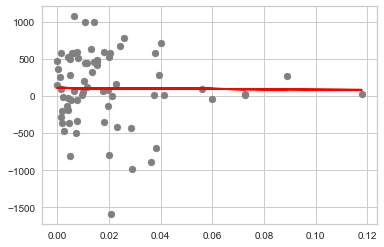

,Actual,Predicted
0,58.500000,104.657691
1,673.000000,101.479884
2,987.166667,104.489407
3,517.125000,105.925955
4,508.500000,105.036460
...,...,...
67,1070.875000,105.391422
68,284.283333,98.065974
69,267.833333,87.143219
70,420.500000,103.405279


In [17]:
# do linear regression on trend by using betweeness as variable
temp = full_table_13
temp[['Trend','Betweeness']]
temp.plot(x='Trend', y='Betweeness', style='o')  
plt.title('Trend vs Betweeness')  
plt.xlabel('Trend')  
plt.ylabel('Betweeness')  
plt.show()

X = temp['Betweeness'].values.reshape(-1,1)
y = temp['Trend'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
df

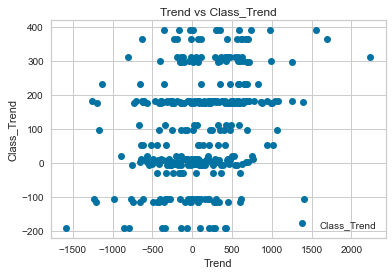

[-14.0612]
[[1.0734]]


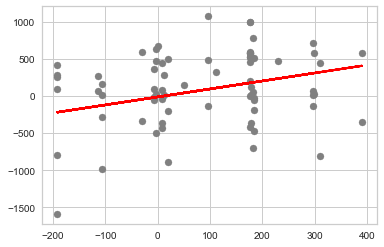

,Actual,Predicted
0,58.500000,181.560345
1,673.000000,-12.636721
2,987.166667,174.606517
3,517.125000,174.784836
4,508.500000,182.430070
...,...,...
67,1070.875000,89.755653
68,284.283333,-2.193024
69,267.833333,-137.579197
70,420.500000,-219.815811


In [18]:
# do linear regression on trend by using class trend as variable
temp[['Trend','Class_Trend']]
temp.plot(x='Trend', y='Class_Trend', style='o')  
plt.title('Trend vs Class_Trend')  
plt.xlabel('Trend')  
plt.ylabel('Class_Trend')  
plt.show()

X = temp['Class_Trend'].values.reshape(-1,1)
y = temp['Trend'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
df

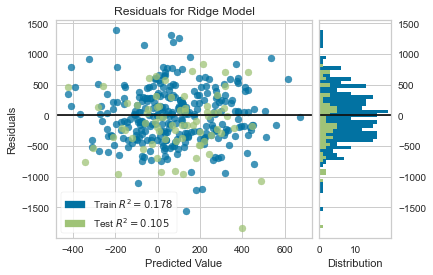

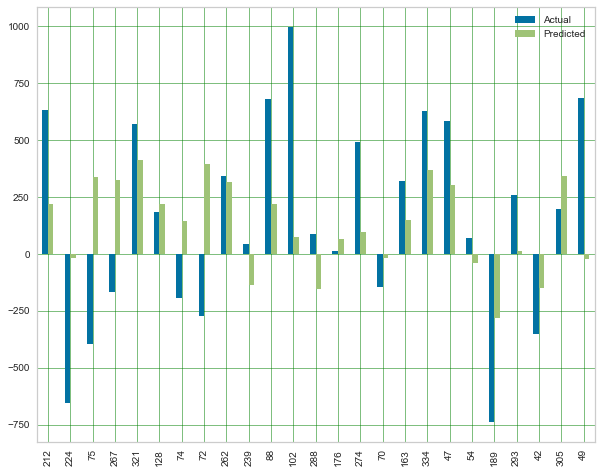

                                 OLS Regression Results                                
Dep. Variable:                  Trend   R-squared (uncentered):                   0.216
Model:                            OLS   Adj. R-squared (uncentered):              0.155
Method:                 Least Squares   F-statistic:                              3.549
Date:                Sat, 24 Oct 2020   Prob (F-statistic):                    4.45e-08
Time:                        14:42:48   Log-Likelihood:                         -2712.0
No. Observations:                 360   AIC:                                      5476.
Df Residuals:                     334   BIC:                                      5577.
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

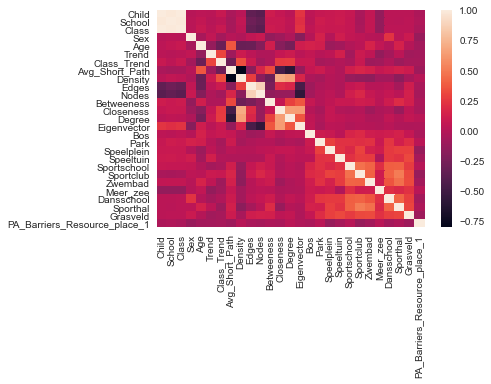

In [19]:
# linear regression on all variables. First is residual plot, second is the actual data vs predicted, third is the OLS data
# and at last is the heatmap of all variables to check for multicolinearity
X = full_table_13.drop(columns = ['Trend', 'Overall_Trend'])
y = full_table_13['Trend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

corr = full_table_13.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
#check for multicollinearity in the data
#results is that obviously there is multicollinearity among Child, Class and school. Same applies with MVPA, Weekend MVPA etc but that is trivial too

In [20]:
# creating 2 participant pools of increasing participants and one of decreasing participants
display(full_table_13.groupby('Overall_Trend').mean())
#observations
#increasing is mostly male, high class trend, lower betweenness, more forests nearby (bos), more playgrounds (speeltuin), lowest barriers for area
#decreasing has for almost almost facilities the lowest number, 

,Child,School,Class,Sex,Age,Trend,Class_Trend,Avg_Short_Path,Density,Edges,Nodes,Betweeness,Closeness,Degree,Eigenvector,Bos,Park,Speelplein,Speeltuin,Sportschool,Sportclub,Zwembad,Meer_zee,Dansschool,Sporthal,Grasveld,PA_Barriers_Resource_place_1
Overall_Trend,,,,,,,,,,,,,,,,,,,,,,,,,,,
decreasing,1953.285714,30.857143,90.714286,0.428571,11.428571,-633.578685,69.691941,1.263825,0.732842,258.000000,18.428571,0.016281,0.788871,1.308672,0.228406,0.142857,0.142857,0.428571,0.428571,0.142857,0.142857,0.428571,0.571429,0.142857,0.571429,0.571429,2.000000
increasing,2099.687500,31.562500,96.187500,0.750000,10.437500,773.485925,193.065450,1.221752,0.731268,255.375000,18.750000,0.013910,0.766614,1.422821,0.214905,0.375000,0.437500,0.500000,0.875000,0.250000,0.437500,0.500000,0.062500,0.187500,0.437500,0.625000,1.750000
no trend,2241.293769,33.308605,101.575668,0.459941,10.575668,87.867125,100.816185,1.254493,0.712058,241.848665,18.459941,0.018424,0.782377,1.455447,0.235848,0.284866,0.480712,0.605341,0.780415,0.344214,0.430267,0.471810,0.195846,0.302671,0.465875,0.780415,1.869436


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

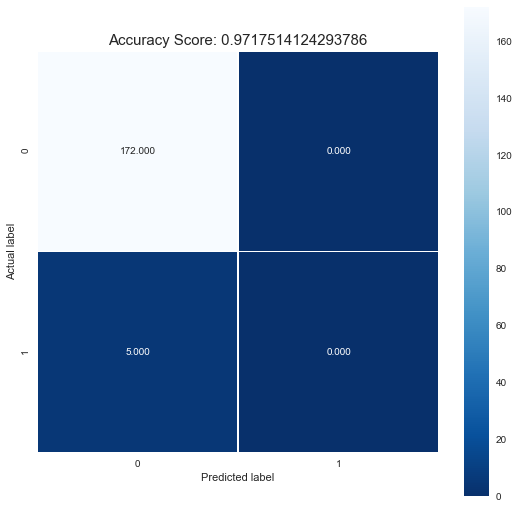

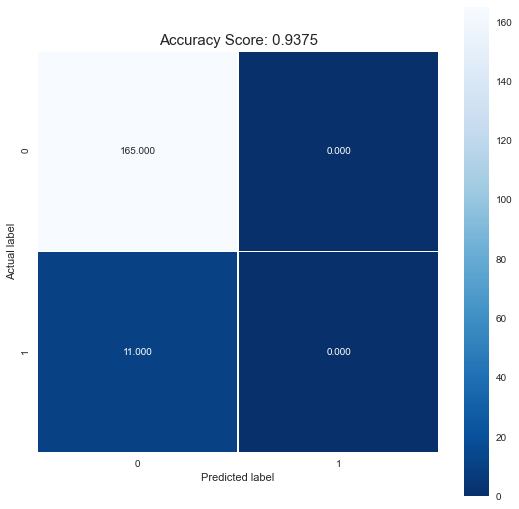

In [21]:
X = full_table_13.drop(columns = ['Trend'])
X = X[X['Overall_Trend'] != 'decreasing']
X = X.drop(['Overall_Trend', 'Child', 'School', 'Class'], axis = 1)

y = full_table_13['Overall_Trend']
y = y[y != 'decreasing']
y = y.replace(['increasing'], 1)
y = y.replace(['no trend'], 0)

lr = LogisticRegression(solver='lbfgs', max_iter=5000)

kf = KFold(n_splits=2, shuffle = True)
kf.split(X) 

for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model = lr.fit(X_train, y_train)
    predictions = lr.predict(X_test)
    cm = metrics.confusion_matrix(y_test, predictions)
    score = lr.score(X_test, y_test)
    # Append to accuracy_model the accuracy of the model
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    display(predictions)



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

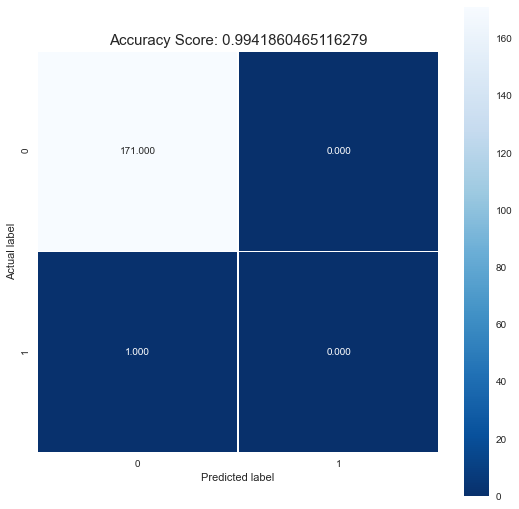

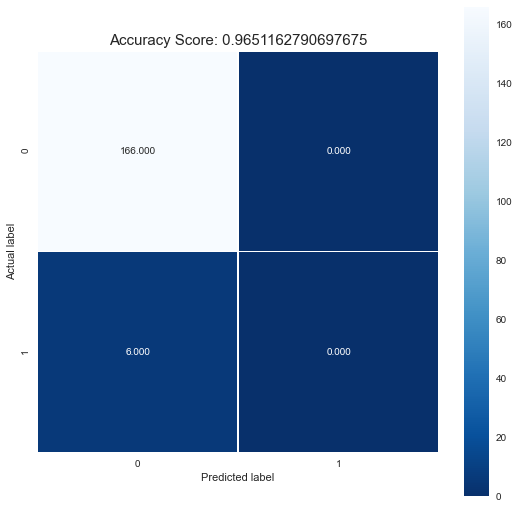

In [22]:
X = full_table_13.drop(columns = ['Trend'])
X = X[X['Overall_Trend'] != 'increasing']
X = X.drop(['Overall_Trend', 'Child', 'School', 'Class', 'Zwembad', 'Meer_zee', 'Dansschool'], axis = 1)

y = full_table_13['Overall_Trend']
y = y[y != 'increasing']
y = y.replace(['decreasing'], 1)
y = y.replace(['no trend'], 0)

lr = LogisticRegression(solver='lbfgs', max_iter=5000)

kf = KFold(n_splits=2, shuffle = True)
kf.split(X) 

for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model = lr.fit(X_train, y_train)
    predictions = lr.predict(X_test)
    cm = metrics.confusion_matrix(y_test, predictions)
    score = lr.score(X_test, y_test)
    # Append to accuracy_model the accuracy of the model
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    display(predictions)



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

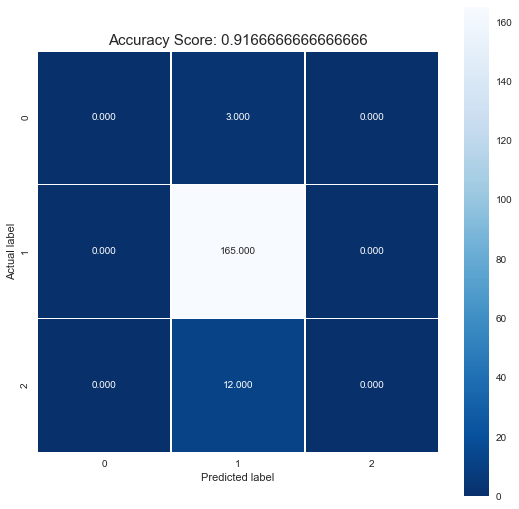

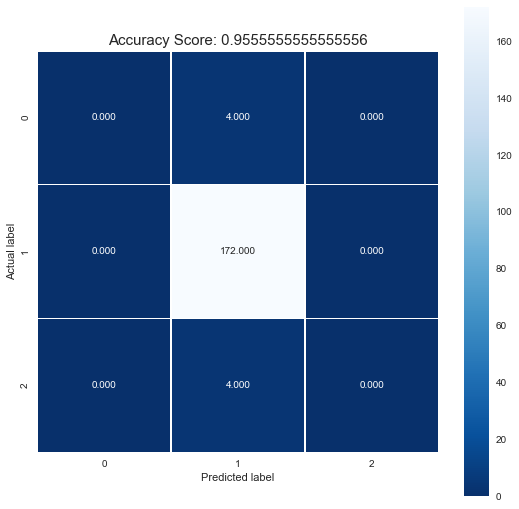

In [23]:
X = full_table_13.drop(columns = ['Trend'])
X = X.drop(['Overall_Trend', 'Child', 'School', 'Class', 'Zwembad', 'Meer_zee', 'Dansschool'], axis = 1)

y = full_table_13['Overall_Trend']
y = y.replace(['increasing'], 1)
y = y.replace(['decreasing'], -1)
y = y.replace(['no trend'], 0)

lr = LogisticRegression(solver='lbfgs', max_iter=5000)

kf = KFold(n_splits=2, shuffle = True)
kf.split(X) 

for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model = lr.fit(X_train, y_train)
    predictions = lr.predict(X_test)
    cm = metrics.confusion_matrix(y_test, predictions)
    score = lr.score(X_test, y_test)
    # Append to accuracy_model the accuracy of the model
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    display(predictions)

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

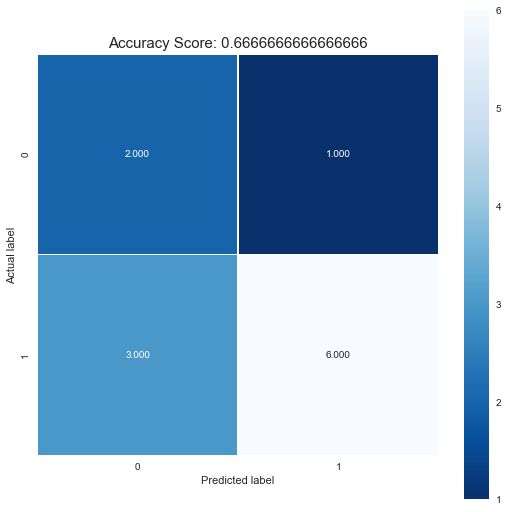

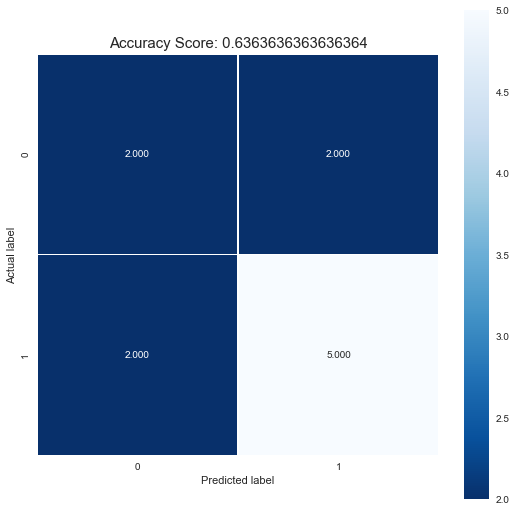

In [25]:
X = full_table_13.drop(columns = ['Trend'])
X = X[X['Overall_Trend'] != 'no trend']
X = X.drop(['Overall_Trend', 'Child', 'School', 'Class', 'Zwembad', 'Meer_zee', 'Dansschool'], axis = 1)

y = full_table_13['Overall_Trend']
y = y[y != 'no trend']
y = y.replace(['increasing'], 1)
y = y.replace(['decreasing'], 0)

lr = LogisticRegression(solver='lbfgs', max_iter=5000)

kf = KFold(n_splits=2, shuffle = True)
kf.split(X) 

for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model = lr.fit(X_train, y_train)
    predictions = lr.predict(X_test)
    cm = metrics.confusion_matrix(y_test, predictions)
    score = lr.score(X_test, y_test)
    # Append to accuracy_model the accuracy of the model
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    display(predictions)

In [38]:
X = full_table_13.drop(columns = ['Trend'])
X = X[['Zwembad','Meer_zee','Dansschool','Nodes','Density']]
all_combinations = []

for r in range(len(X) + 1):
    combinations_object = itertools.combinations(X, r)
    combinations_list = list(combinations_object)
    all_combinations += combinations_list

all_combinations.pop(0)
all_combinations = list(all_combinations)
all_combinations = [item.replace(",", "") for item in all_combinations]

AttributeError: 'tuple' object has no attribute 'replace'

In [ ]:
df_results = []
for combination in all_combinations:
    print(combination)
    X = X[[combination]]
    y = full_table_13['Overall_Trend']
    y = y[y != 'no trend']
    y = y.replace(['increasing'], 1)
    y = y.replace(['decreasing'], 0)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    model = lr.fit(X_train, y_train)
    score = lr.score(X_test, y_test)

    df_results += [combination, score]